## WNS Hackathon

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
#import dataset
train_df= pd.read_csv("train_.csv")

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


### data prep

In [4]:
train_df.shape

(54808, 14)

In [5]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
train_df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [8]:
cat_cols=train_df.columns[train_df.dtypes == 'object']
cat_cols[0]

'department'

In [9]:
#missing values
nulls=train_df.isnull().sum()

In [10]:
percent_nulls=(train_df.isnull().sum()/train_df.shape[0])*100

In [11]:
percent_nulls

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
is_promoted             0.000000
dtype: float64

(array([ 2409.,     0.,     0., 36669.,     0.,     0.,   805.,     0.,
            0., 14925.]),
 array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ]),
 <a list of 10 Patch objects>)

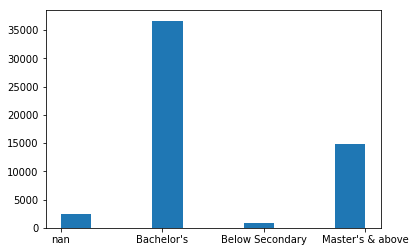

In [12]:
plt.hist(train_df['education'])

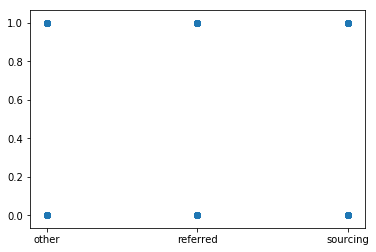

In [137]:
plt.scatter(train_df['recruitment_channel'],train_df['is_promoted'])

In [13]:
import pylab

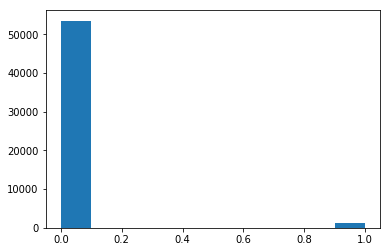

In [14]:
pylab.figure()
pylab.hist(train_df['awards_won?'])
pylab.show()

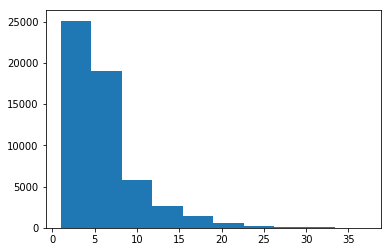

In [15]:
pylab.figure()
pylab.hist(train_df['length_of_service'])
pylab.show()


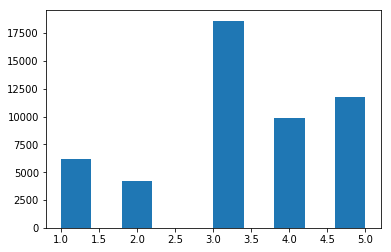

In [16]:
pylab.figure()
pylab.hist(train_df['previous_year_rating'][~np.isnan(train_df['previous_year_rating'])])
pylab.show()

In [17]:
train_df['previous_year_rating'].value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [18]:
train_df['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [19]:
cat_cols

Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')

In [20]:
train_df['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [21]:
training_set=train_df.copy()

###  imputation(handling nulls)

In [22]:
from sklearn.preprocessing import Imputer

In [23]:
imputer=Imputer(strategy='mean')

In [24]:
training_set['previous_year_rating']= imputer.fit_transform(training_set['previous_year_rating'].reshape(-1,1))

C:\Users\ANURAG\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [25]:
imputer2=Imputer(strategy='mode')

In [26]:
training_set['education'].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [27]:
training_set['education'].fillna("Bachelor's",inplace=True)

In [28]:
training_set.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [29]:
empid_train= training_set.pop('employee_id')
Target=training_set.pop('is_promoted')

In [30]:
training_set.shape

(54808, 12)

### OHE(get dummies)

In [31]:
training_set.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [32]:
cols= ['department','region','education','gender','recruitment_channel']

In [33]:
cols

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [34]:
for col in cols:
    dummies = pd.get_dummies(training_set[col],prefix=col)
    training_set = pd.concat([training_set,dummies],axis = 1)

In [35]:
#dummies = pd.get_dummies(training_set['recruitment_channel'],prefix=col)
#training_set = pd.concat([training_set,dummies],axis = 1)
#training_set.drop('recruitment_channel',inplace=True,axis=1)

In [36]:
for col in cols:
    training_set.drop(col,inplace=True,axis=1)

In [37]:
training_set.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,35,5.0,8,1,0,49,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1,1,30,5.0,4,0,0,60,0,0,0,...,0,0,1,0,0,0,1,1,0,0
2,1,34,3.0,7,0,0,50,0,0,0,...,0,0,1,0,0,0,1,0,0,1
3,2,39,1.0,10,0,0,50,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1,45,3.0,2,0,0,73,0,0,0,...,0,0,1,0,0,0,1,1,0,0


In [38]:
X=training_set

In [39]:
X.shape

(54808, 58)

In [40]:
y=Target

### train test split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_val,y_train,y_val= train_test_split(X,y,test_size=0.4,random_state=900)

### Logistic Regression

In [43]:
#logistic regression implementation
model_logreg= LogisticRegression()

In [44]:
model_logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
#predicting validation set
ypred=model_logreg.predict(X_val)

In [46]:
from sklearn.metrics import accuracy_score,classification_report,f1_score

In [47]:
# f1 score
f1_train=f1_score(y_val,ypred)
f1_train

0.37140439932318103

In [48]:
#classification report
report=classification_report(y_val,ypred)
report

'             precision    recall  f1-score   support\n\n          0       0.94      0.99      0.96     20102\n          1       0.81      0.24      0.37      1822\n\navg / total       0.92      0.93      0.91     21924\n'

In [49]:
# accuracy
acc= accuracy_score(y_val,ypred)

In [50]:
acc

0.9322203977376391

### Test set preparation

In [51]:
#test set
test_df= pd.read_csv('test_.csv')

In [52]:
test_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [53]:
#missing values
test_nulls=test_df.isnull().sum()

In [54]:
test_nulls_percent= 100*(test_df.isnull().sum()/test_df.shape[0])

In [55]:
test_nulls_percent

employee_id             0.000000
department              0.000000
region                  0.000000
education               4.401873
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.713921
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [56]:
test_df['previous_year_rating']= imputer.fit_transform(test_df['previous_year_rating'].reshape(-1,1))

C:\Users\ANURAG\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [57]:
test_df['education'].value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [58]:
test_df['education'].fillna("Bachelor's",inplace=True)

In [59]:
test_df.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [60]:
empid= test_df.pop('employee_id')
for col in cols:
    dummies = pd.get_dummies(test_df[col],prefix=col)
    test_df = pd.concat([test_df,dummies],axis = 1)
    test_df.drop(col,inplace=True,axis=1)

In [61]:
test_df.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,region_region_8,region_region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,1,24,3.339146,1,1,0,77,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,1,31,3.000000,5,0,0,51,0,0,1,...,0,0,1,0,0,1,0,1,0,0
2,1,31,1.000000,4,0,0,47,0,0,0,...,0,0,1,0,0,0,1,1,0,0
3,3,31,2.000000,9,0,0,65,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1,30,4.000000,7,0,0,61,0,1,0,...,0,0,1,0,0,0,1,0,0,1


In [62]:
test_df.shape

(23490, 58)

In [63]:
is_promoted= model_logreg.predict(test_df)

In [64]:
type(empid)

pandas.core.series.Series

In [65]:
type(is_promoted)

numpy.ndarray

In [66]:
Is_promoted= pd.Series(is_promoted)

In [67]:
submission= pd.concat([empid,Is_promoted],axis=1)

In [68]:
submission.rename(columns={'0': 'target'}, inplace=True)


In [69]:
submission.head()

,employee_id,0
0,8724,0
1,74430,0
2,72255,0
3,38562,0
4,64486,0


In [70]:
submission.to_csv("Submit1.csv")

### Decision tree model

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
model_dtree= DecisionTreeClassifier()

In [73]:
model_dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
pred_train_dtree= model_dtree.predict(X_val)

In [75]:
f1_dtree= f1_score(y_val,pred_train_dtree)

In [76]:
f1_dtree

0.42953020134228187

In [77]:
pred_test_dtree= pd.Series(model_dtree.predict(test_df))

In [78]:
submission2= pd.concat([empid,pred_test_dtree],axis=1)

In [79]:
submission2.to_csv("submission2.csv")

### Random_forest

In [80]:
from sklearn.ensemble import RandomForestClassifier


In [81]:
model_rf= RandomForestClassifier(n_estimators=50)


In [82]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
ypred_train_rf= model_rf.predict(X_val)

In [84]:
f1_train_rf= f1_score(y_val,ypred_train_rf)

In [85]:
f1_train_rf

0.4090721649484536

In [86]:
model_rf1= RandomForestClassifier(n_estimators=150,criterion='entropy')
model_rf1.fit(X_train,y_train)
ypred_train_rf1= model_rf1.predict(X_val)
f1_train_rf1= f1_score(y_val,ypred_train_rf1)
f1_train_rf1

0.4148453608247422

In [87]:
model_rf2= RandomForestClassifier(n_estimators=200,criterion='entropy')
model_rf2.fit(X_train,y_train)
ypred_train_rf2= model_rf2.predict(X_val)
acc_train_rf2= accuracy_score(y_val,ypred_train_rf2)


In [88]:
acc_train_rf2

0.9349571246122971

In [89]:
report_train_rf2= classification_report(y_val,ypred_train_rf2)

In [90]:
report_train_rf2

'             precision    recall  f1-score   support\n\n          0       0.94      0.99      0.97     20102\n          1       0.83      0.28      0.41      1822\n\navg / total       0.93      0.93      0.92     21924\n'

In [91]:
f1_train_rf2= f1_score(y_val,ypred_train_rf2)
f1_train_rf2

0.41316872427983536

### KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
model_knn=KNeighborsClassifier(n_neighbors=4)

In [94]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [95]:
ypred_train_knn= model_knn.predict(X_val)

In [96]:
f1_train_knn= f1_score(y_val,ypred_train_knn)

In [97]:
f1_train_knn

0.19530876017233123

### Boosting

In [98]:
import xgboost as xgb

In [99]:
#dmarices for train test and validation set
xgbtrain = xgb.DMatrix(X_train, label = y_train)
xgbval = xgb.DMatrix(X_val, label = y_val) 

In [100]:
watchlist = [(xgbtrain,'train'),(xgbval, 'eval')]

In [101]:
# parameters

params = {}
params["objective"] =  "binary:logistic"
params["booster"] = "gbtree"
params["max_depth"] = 7
params["eval_metric"] = 'error'
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8
params["silent"] = 1
params["seed"] = 4
params["eta"] = 0.1

plst = list(params.items())

In [102]:
#Running the model with 150 iterations and parameters defined above

num_rounds = 150
model_cv = xgb.train(plst, xgbtrain, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-error:0.069669	eval-error:0.071018
Multiple eval metrics have been passed: 'eval-error' will be used for early stopping.

Will train until eval-error hasn't improved in 10 rounds.
[1]	train-error:0.068179	eval-error:0.068509
[2]	train-error:0.066689	eval-error:0.067369
[3]	train-error:0.069821	eval-error:0.069969
[4]	train-error:0.066811	eval-error:0.067916
[5]	train-error:0.065746	eval-error:0.066366
[6]	train-error:0.065685	eval-error:0.066822
[7]	train-error:0.065077	eval-error:0.065955
[8]	train-error:0.064712	eval-error:0.065727
[9]	train-error:0.063435	eval-error:0.064404
[10]	train-error:0.063466	eval-error:0.064815
[11]	train-error:0.063739	eval-error:0.064997
[12]	train-error:0.063131	eval-error:0.064769
[13]	train-error:0.063344	eval-error:0.064906
[14]	train-error:0.063101	eval-error:0.064815
[15]	train-error:0.062949	eval-error:0.064404
[16]	train-error:0.062736	eval-error:0.063994
[17]	train-error:0.062675	eval-error:0.064131
[18]	train-error:0.060911	eval-error:

In [105]:
# parameters

params = {}
params["objective"] =  "binary:logistic"
params["booster"] = "gbtree"
params["max_depth"] = 7
params["eval_metric"] = 'map'
params["subsample"] = 0.8
params["colsample_bytree"] = 0.8
params["silent"] = 1
params["seed"] = 4
params["eta"] = 0.1

plst = list(params.items())

In [106]:

num_rounds = 150
model_cv = xgb.train(plst, xgbtrain, num_rounds, evals = watchlist, early_stopping_rounds = 10, verbose_eval = True)

[0]	train-map:0.486968	eval-map:0.433418
Multiple eval metrics have been passed: 'eval-map' will be used for early stopping.

Will train until eval-map hasn't improved in 10 rounds.
[1]	train-map:0.513113	eval-map:0.456881
[2]	train-map:0.532124	eval-map:0.462955
[3]	train-map:0.537192	eval-map:0.460753
[4]	train-map:0.554067	eval-map:0.478091
[5]	train-map:0.575355	eval-map:0.50412
[6]	train-map:0.57426	eval-map:0.500532
[7]	train-map:0.576608	eval-map:0.503172
[8]	train-map:0.585747	eval-map:0.509646
[9]	train-map:0.598087	eval-map:0.525002
[10]	train-map:0.597957	eval-map:0.524352
[11]	train-map:0.597563	eval-map:0.522092
[12]	train-map:0.604497	eval-map:0.529105
[13]	train-map:0.60444	eval-map:0.527575
[14]	train-map:0.609934	eval-map:0.531142
[15]	train-map:0.614518	eval-map:0.537648
[16]	train-map:0.618941	eval-map:0.539932
[17]	train-map:0.623799	eval-map:0.546847
[18]	train-map:0.625318	eval-map:0.548442
[19]	train-map:0.628927	eval-map:0.552734
[20]	train-map:0.634084	eval-map

### XGboost using sklearn

In [108]:
from xgboost import XGBClassifier

In [109]:
model_xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [111]:
ypred_val_xgb= model_xgb.predict(X_val)


C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [114]:
X_train.shape

(32884, 58)

In [115]:
ypred_val_xgb

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [117]:
f1_xgb= f1_score(y_val, ypred_val_xgb)

In [118]:
f1_xgb

0.435042735042735

In [120]:
ypred_test_xgb=model_xgb.predict(test_df)

C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [121]:
ypred_test_xgb

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [123]:
ypred_test_xgb=pd.Series(ypred_test_xgb)

In [124]:
submission3= pd.concat([empid,ypred_test_xgb],axis=1)

In [125]:
submission3.to_csv("submission3.csv") 

### XGB with 200 estimators

In [126]:
model_xgb1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

# number of estimators are increased to 200

In [127]:
model_xgb1.fit(X_train,y_train)
ypred_val_xgb1= model_xgb1.predict(X_val)
ypred_test_xgb1=model_xgb1.predict(test_df)
ypred_test_xgb1=pd.Series(ypred_test_xgb1)
submission4= pd.concat([empid,ypred_test_xgb1],axis=1)
submission4.to_csv("submission4.csv") 

C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [132]:
f1_xgb_1=f1_score(y_val,ypred_val_xgb1)

In [133]:
f1_xgb_1


0.46627810158201494

### changed values of params as gamma=0.5,learning_rate=0.01 and estimators=250

In [128]:
model_xgb2 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.5, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=200,
       silent=True, subsample=1)




In [129]:
model_xgb2.fit(X_train,y_train)
ypred_val_xgb2= model_xgb2.predict(X_val)

ypred_test_xgb2=model_xgb2.predict(test_df)

ypred_test_xgb2=pd.Series(ypred_test_xgb2)
submission5= pd.concat([empid,ypred_test_xgb2],axis=1)
submission5.to_csv("submission5.csv") 

C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [130]:
f1_xgb_2=f1_score(y_val,ypred_val_xgb2)

In [131]:
f1_xgb_2

0.25941821649976154

In [135]:
feat_imp = pd.Series(model_cv.get_fscore()).sort_values(ascending=False)

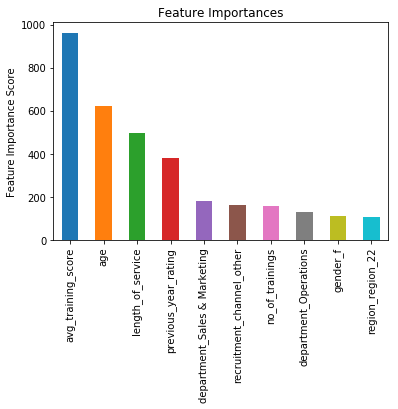

In [136]:
import matplotlib.pyplot as plt
feat_imp[:10].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.show()

In [138]:
# naive bayes' classifier
from sklearn.naive_bayes import GaussianNB

In [139]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None)

In [140]:
ypred_gnb=gnb.predict(X_val)

In [141]:
f1_gnb= f1_score(y_val,ypred_gnb)

In [142]:
f1_gnb

0.2290606985418786

### XGB using 'dart' booster and 200 stimators

In [143]:
model_xgb3_dart = XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=200,
       silent=True, subsample=1)

In [144]:
model_xgb3_dart.fit(X_train,y_train)
ypred_val_xgb3= model_xgb3_dart.predict(X_val)

ypred_test_xgb3=model_xgb3_dart.predict(test_df)

ypred_test_xgb3=pd.Series(ypred_test_xgb3)
submission6= pd.concat([empid,ypred_test_xgb3],axis=1)
submission6.to_csv("submission6.csv") 

C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [145]:
f1_xgb3_dart= f1_score(y_val,ypred_val_xgb3)

In [146]:
f1_xgb3_dart

0.48796409628722964

In [147]:
model_xgb4_dart = XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=200,
       silent=True, subsample=1)

In [148]:
model_xgb4_dart.fit(X_train,y_train)
ypred_val_xgb4= model_xgb4_dart.predict(X_val)

ypred_test_xgb4=model_xgb4_dart.predict(test_df)

ypred_test_xgb4=pd.Series(ypred_test_xgb4)
submission7= pd.concat([empid,ypred_test_xgb4],axis=1)
submission7.to_csv("submission7.csv") 

C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [149]:
f1_xgb4_dart= f1_score(y_val,ypred_val_xgb4)

In [150]:
f1_xgb4_dart

0.5017967984318851

In [151]:
model_xgb5_dart = XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=3, seed=200,
       silent=True, subsample=1)

In [152]:
#fitting the model
model_xgb5_dart.fit(X_train,y_train)
#validatio set
ypred_val_xgb5= model_xgb5_dart.predict(X_val)

#test set
ypred_test_xgb5=model_xgb5_dart.predict(test_df)

# converting to pandas series
ypred_test_xgb5=pd.Series(ypred_test_xgb5)

submission8= pd.concat([empid,ypred_test_xgb5],axis=1)
submission8.to_csv("submission8.csv") 

C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\ANURAG\Anaconda4\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [153]:
f1_xgb5_dart= f1_score(y_val,ypred_val_xgb5)
f1_xgb5_dart

0.4979894834519022